In [1]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
from  matplotlib import pyplot as plt

# Interactive Visualization
import plotly.graph_objects as go
import plotly.express as px

# sats
from statsmodels.tsa.seasonal import STL

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import r2_score


In [2]:
# Import and clean data

df = pd.read_csv('../../data/processed/qqq_close').drop(columns='Unnamed: 0')
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={"close":"QQQ","US05Y, TVC: Close": "US05Y","US10Y, TVC: Close":"US10Y","US30Y, TVC: Close":"US30Y"}, inplace=True)

In [36]:
display(df.drop(columns='Volume').corr())

,QQQ,US05Y,US10Y,US30Y
QQQ,1.000000,-0.408306,-0.586338,-0.711703
US05Y,-0.408306,1.000000,0.964207,0.873779
US10Y,-0.586338,0.964207,1.000000,0.968174
US30Y,-0.711703,0.873779,0.968174,1.000000


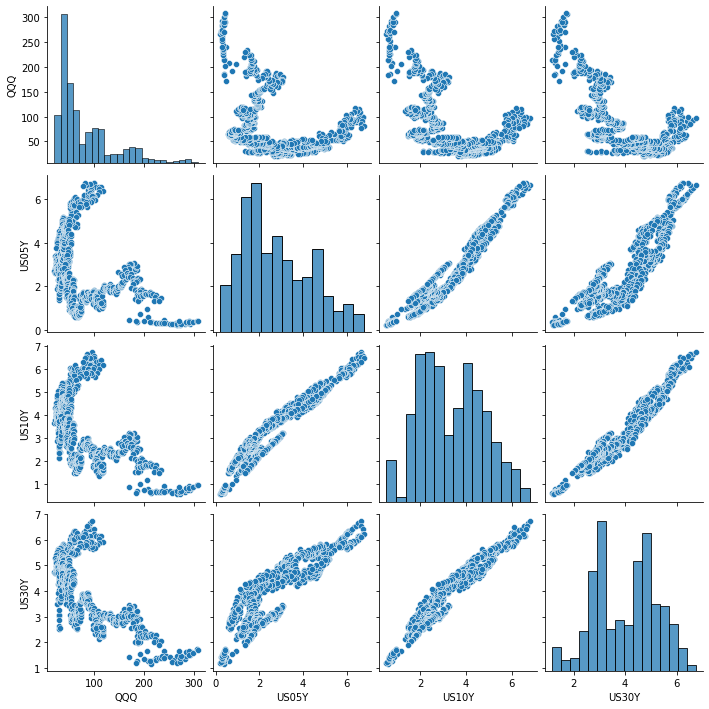

In [4]:
sns.pairplot(df.drop(columns='Volume'))

In [5]:
df.columns

Index(['date', 'QQQ', 'US05Y', 'US10Y', 'US30Y', 'Volume'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    1136 non-null   datetime64[ns, UTC]
 1   QQQ     1136 non-null   float64            
 2   US05Y   1136 non-null   float64            
 3   US10Y   1136 non-null   float64            
 4   US30Y   1136 non-null   float64            
 5   Volume  1136 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 53.4 KB


In [7]:
df.set_index(df['date'],inplace=True)

In [8]:
df['date'].asfreq(freq='w')
df.set_index(df['date'],inplace=True)


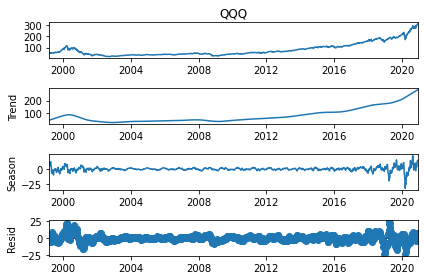

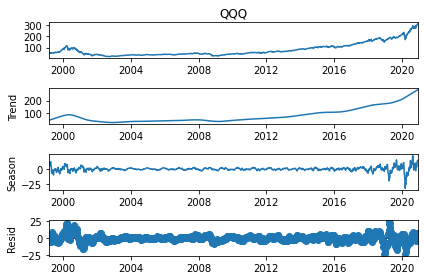

In [9]:
stl = STL(df['QQQ'], period =50)
res = stl.fit()
res.plot()

In [10]:
qqq_trend = res.trend
qqq_seasonal = res.seasonal
qqq_resid = res.resid
qqq_weights = res.weights

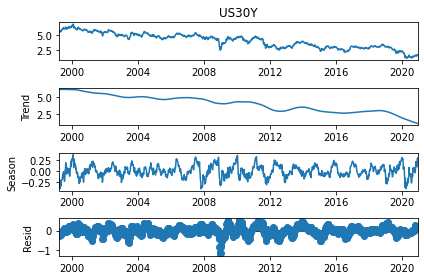

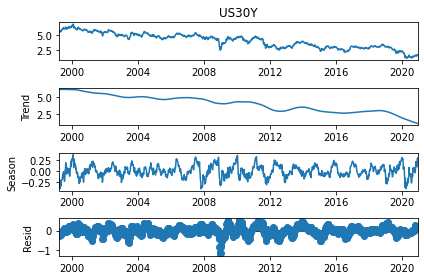

In [11]:
stl = STL(df['US30Y'], period =60)
res2 = stl.fit()
res2.plot()

In [12]:
us30y_trend = res2.trend
us30y_seasonal = res2.seasonal

us30y_resid = res2.resid
us30y_weights = res2.weights

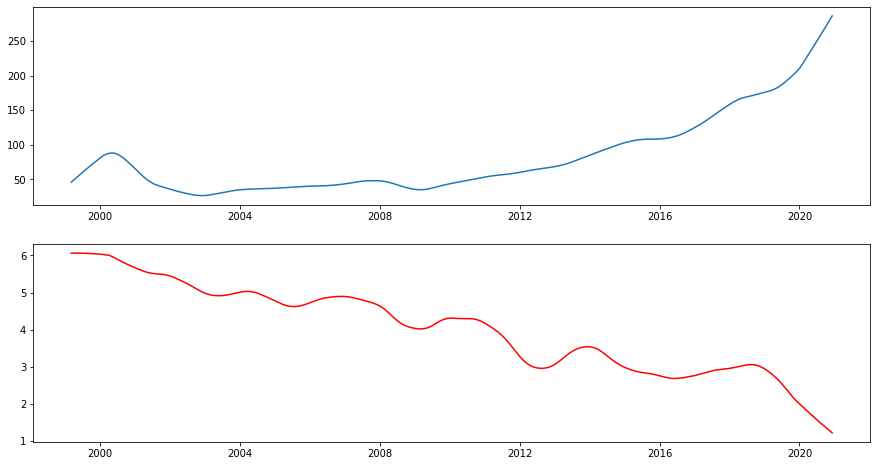

In [13]:
## Trend
fig, ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(qqq_trend)
ax[1].plot(us30y_trend, color = 'r');

- The picture above compares the trend  

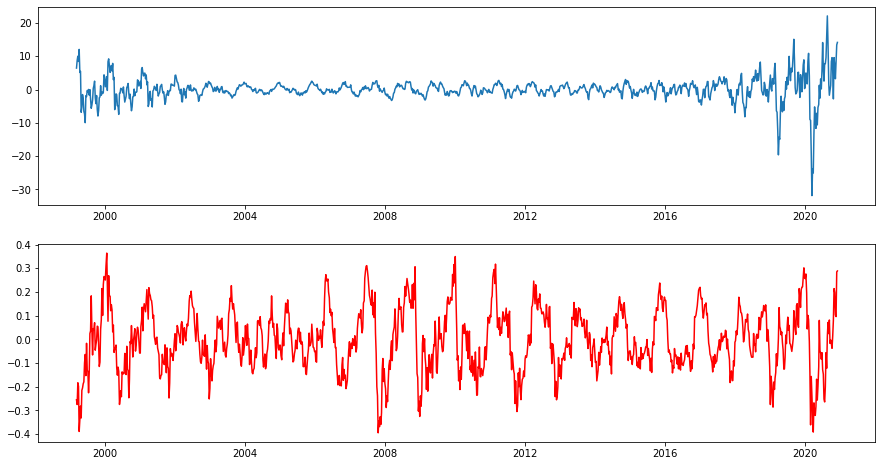

In [14]:
## seasonal
fig, ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(qqq_seasonal)
ax[1].plot(us30y_seasonal, color = 'r');

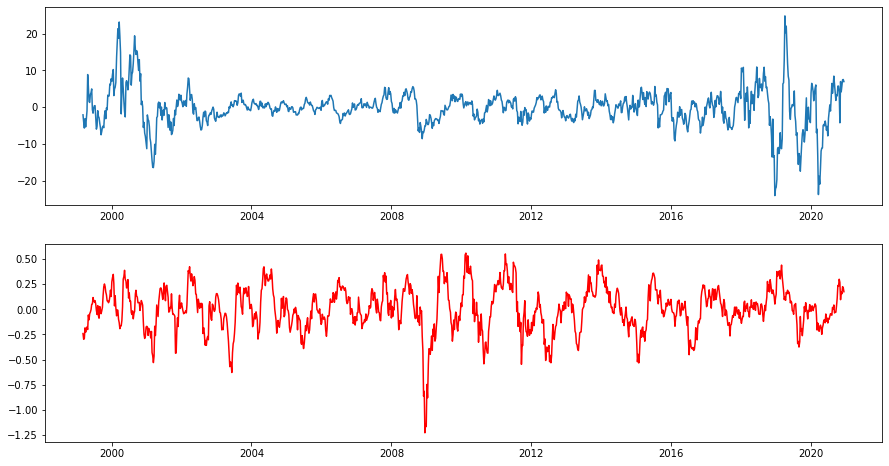

In [15]:
## resid
fig, ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(qqq_resid)
ax[1].plot(us30y_resid, color = 'r');

In [16]:
# helper
def fit_poly(X,y,k):
    # Transforms our data to allow for Polynomial regression (Matrix from last class)
    poly = PolynomialFeatures(k)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    # Linear Regression Model
    lr = LinearRegression()
    lr.fit(X_poly,y)
    return lr

### Polinomial Regression k = 2

In [17]:
## importing modules
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp


Coeficients:[   0.         -170.47677235   17.25211723], 
Intercept:463.33908937409115
y = 463.33908937409115x^0+-170.47677234605123x^1+17.252117229655482x^2


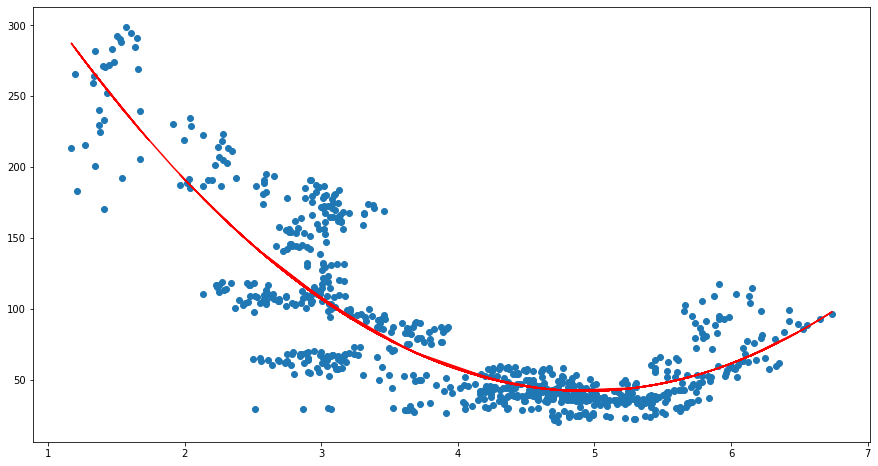

In [18]:
# double splitting
X, y = df[['US30Y']].values,df['QQQ'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=2)

# Calling
lr = fit_poly(X_train,y_train,2)

# Variables regression 
print(f'Coeficients:{lr.coef_}, \nIntercept:{lr.intercept_}')

# The function
b0,b1,b2 = lr.coef_
b0 = lr.intercept_
lr_func = lambda x: b0*x**0 + b1*x**1 + b2*x**2
print(f"y = {b0}x^0+{b1}x^1+{b2}x^2")


# plotting on train 
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X_train,y_train)
plt.plot(X, lr_func(X),c="red");

R2:0.7005174721770199


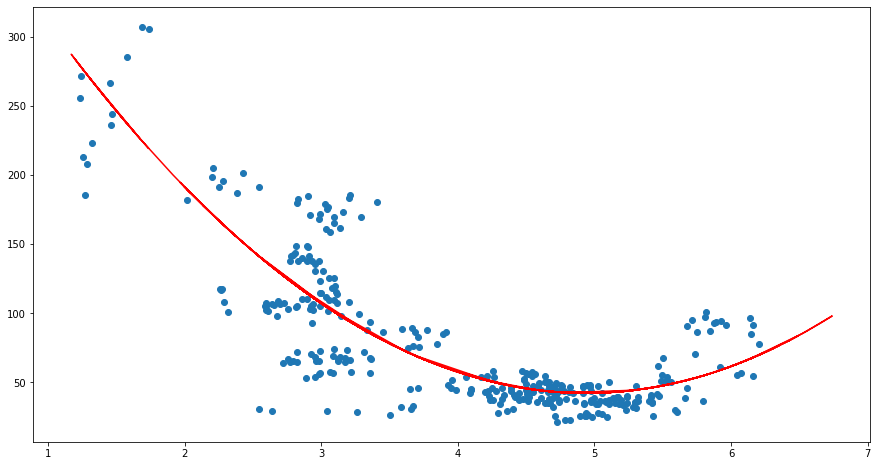

In [19]:
# plotting on test
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X_test,y_test)
plt.plot(X, lr_func(X),c="red")

from sklearn.metrics import r2_score
pre_process = PolynomialFeatures(degree=2)
test_y_pred = lr.predict(pre_process.fit_transform(X_test))

r2_test = r2_score(y_true=y_test, y_pred=test_y_pred )
print(f'R2:{r2_test}')

In [20]:
## Metrics


## Polinomial Regression 2 Lagged QQQ

In [21]:
leading1 = df[['US30Y']][:-30]
lagged1 = df['QQQ'][30:]

Coeficients:[   0.         -196.39692877   19.800722  ], 
Intercept:528.0539745733485
y = 528.0539745733485x^0+-196.39692877401717x^1+19.800722003148906x^2


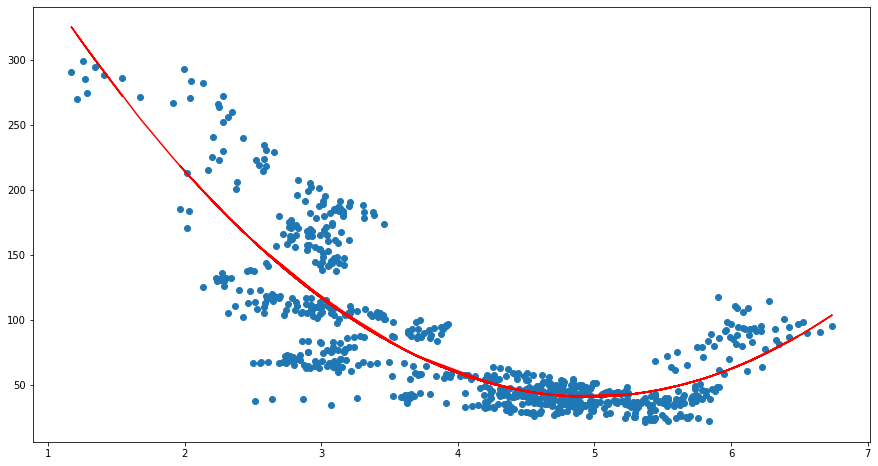

In [22]:
# double splitting
X, y = leading1.values,lagged1.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=2)

# Calling
lr = fit_poly(X_train,y_train,2)

# Variables regression 
print(f'Coeficients:{lr.coef_}, \nIntercept:{lr.intercept_}')

# The function
b0,b1,b2 = lr.coef_
b0 = lr.intercept_
lr_func = lambda x: b0*x**0 + b1*x**1 + b2*x**2
print(f"y = {b0}x^0+{b1}x^1+{b2}x^2")

# plotting on train 
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X_train,y_train)
plt.plot(X, lr_func(X),c="red");

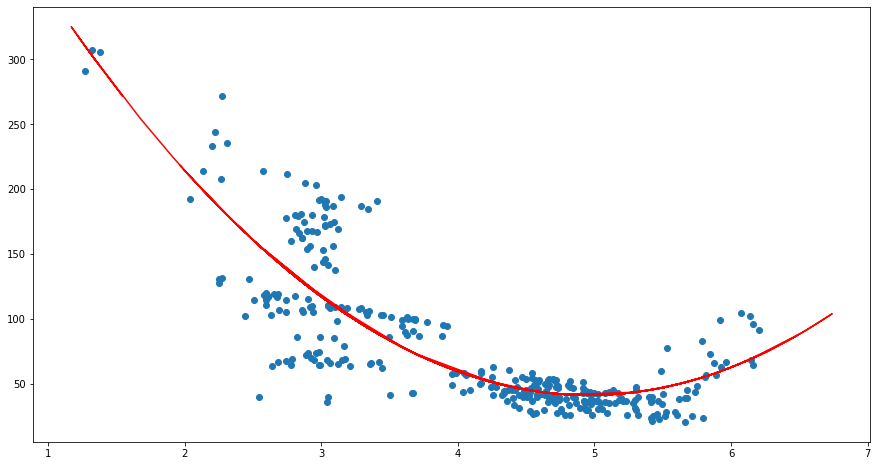

In [23]:
# plotting on test
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X_test,y_test)
plt.plot(X, lr_func(X),c="red");

In [24]:
## Metrics
from sklearn.metrics import r2_score
pre_process = PolynomialFeatures(degree=2)
test_y_pred = lr.predict(pre_process.fit_transform(X_test))

r2_test = r2_score(y_true=y_test, y_pred=test_y_pred )
print(f'R2:{r2_test}')

R2:0.6850754430701698


### Polinomial Regression  Lagged QQQ

Coeficients:[   0.         -196.39692877   19.800722  ], 
Intercept:528.0539745733485
y = 528.0539745733485x^0+-196.39692877401717x^1+19.800722003148906x^2
R2:0.6850754430701698


(0.6850754430701698,
 528.0539745733485,
 array([   0.        , -196.39692877,   19.800722  ]))

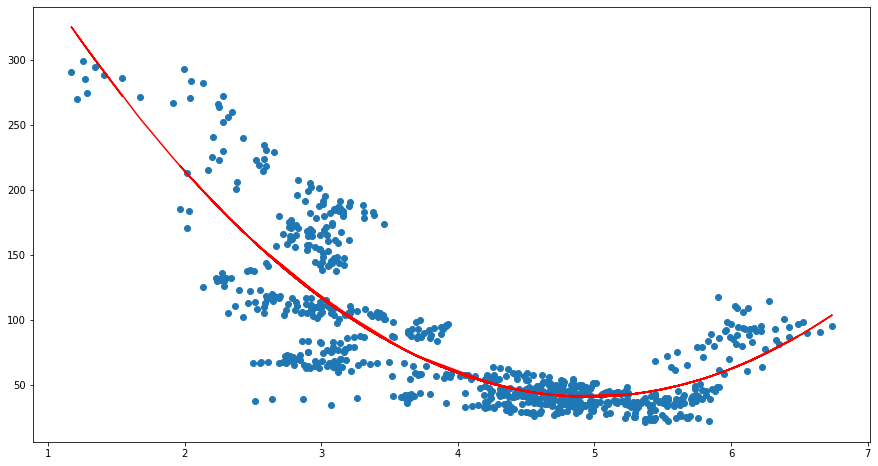

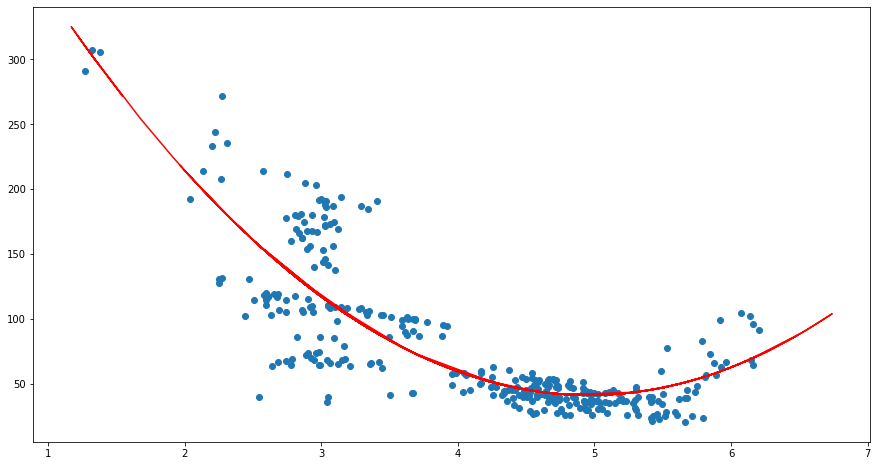

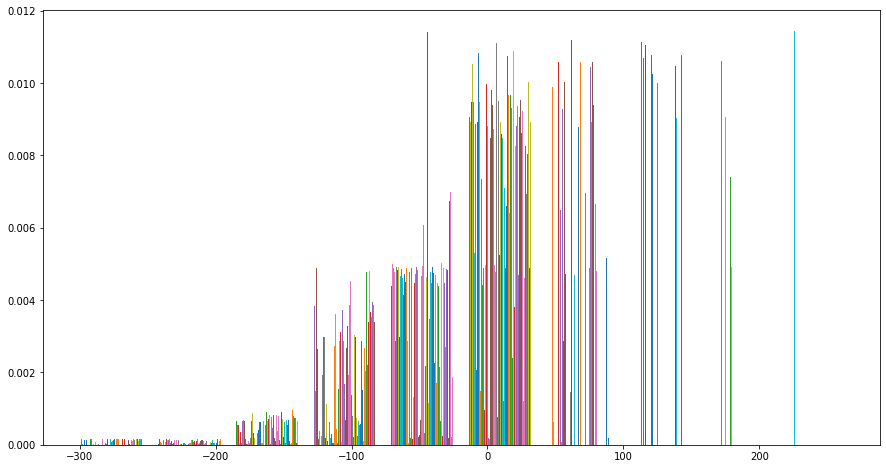

In [25]:
# double splitting
X, y = leading1.values,lagged1.values

def polinomial2_regression (X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=2)

    # Calling
    lr = fit_poly(X_train,y_train,2)

    # Variables regression 
    print(f'Coeficients:{lr.coef_}, \nIntercept:{lr.intercept_}')

    # The function
    b0,b1,b2 = lr.coef_
    b0 = lr.intercept_
    lr_func = lambda x: b0*x**0 + b1*x**1 + b2*x**2
    print(f"y = {b0}x^0+{b1}x^1+{b2}x^2")

    # plotting on train 
    fig, ax = plt.subplots(figsize=(15,8))
    plt.scatter(X_train,y_train)
    plt.plot(X, lr_func(X),c="red");

    # plotting on test
    fig, ax = plt.subplots(figsize=(15,8))
    plt.scatter(X_test,y_test)
    plt.plot(X, lr_func(X),c="red");

    pre_process = PolynomialFeatures(degree=2)
    test_y_pred = lr.predict(pre_process.fit_transform(X_test))

    r2_test = r2_score(y_true=y_test, y_pred=test_y_pred )
    print(f'R2:{r2_test}')
    
    fig, ax = plt.subplots(figsize=(15,8))
    plt.hist((y_test-lr_func(X)),density=True)
    
    return (r2_test,lr.intercept_,lr.coef_)

polinomial2_regression(leading1.values,lagged1.values)

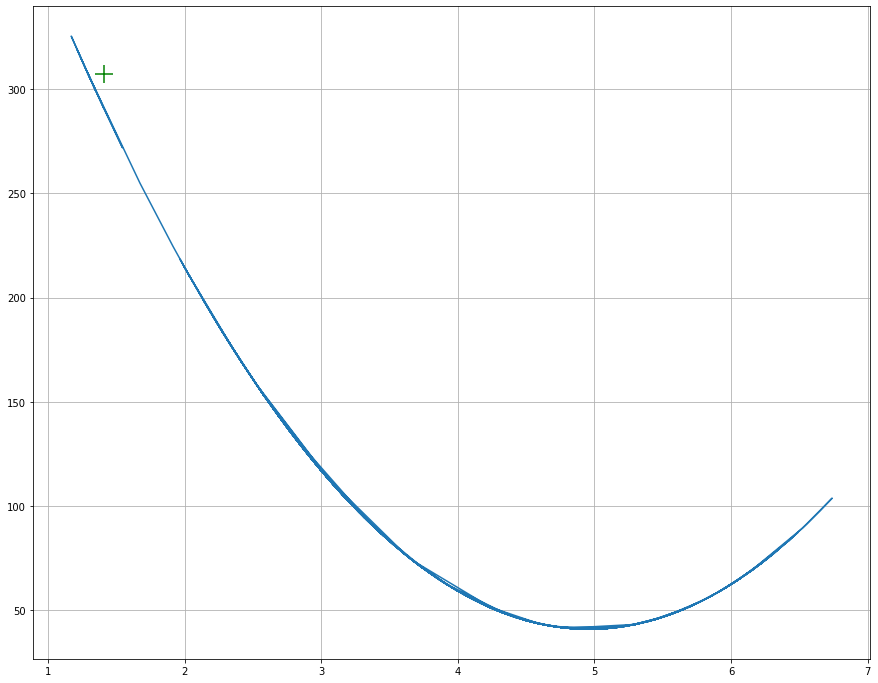

In [26]:
plt.rcParams["figure.figsize"] = (12,12)
X, y = df[['US30Y']][:-28].values, df['QQQ'][28:].values

fig, ax = plt.subplots(figsize=(15,12))
plt.plot(X, lr_func(X))
plt.scatter(X[-1:],y[-1:], marker = '+',color = 'green', s = 300)
plt.grid();

# Adding Probabilities to the Model

Assuming QQQ normally distributed arround the regression model

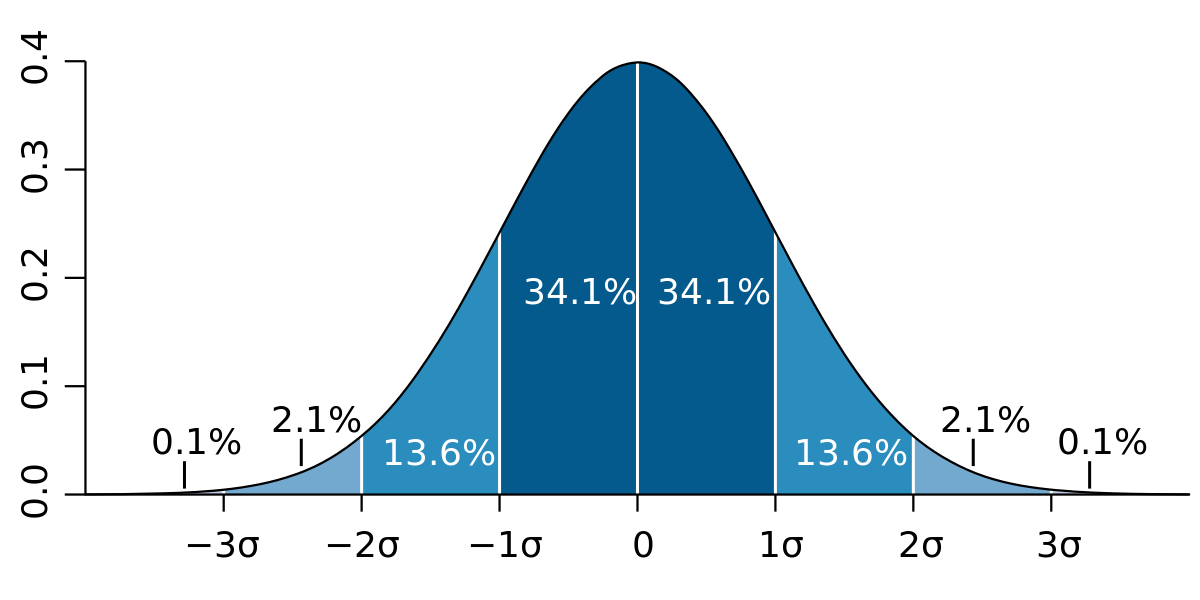

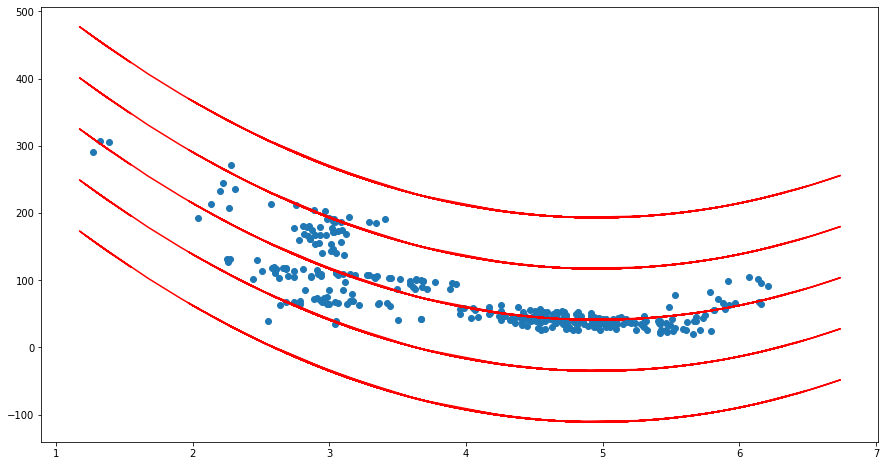

In [27]:
# Traditional std

# std formula
y_std  = np.std(y-lr_func(X))

std5 =  lr_func(X) + y_std
std4 = lr_func(X) + 2*y_std
std2 = lr_func(X) -y_std
std1=  lr_func(X) -2 * y_std

fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X_test,y_test)
plt.plot(X, lr_func(X),c="red")
plt.plot(X, std5,c="red")
plt.plot(X, std4,c="red")
plt.plot(X, std2,c="red")
plt.plot(X, std1,c="red")

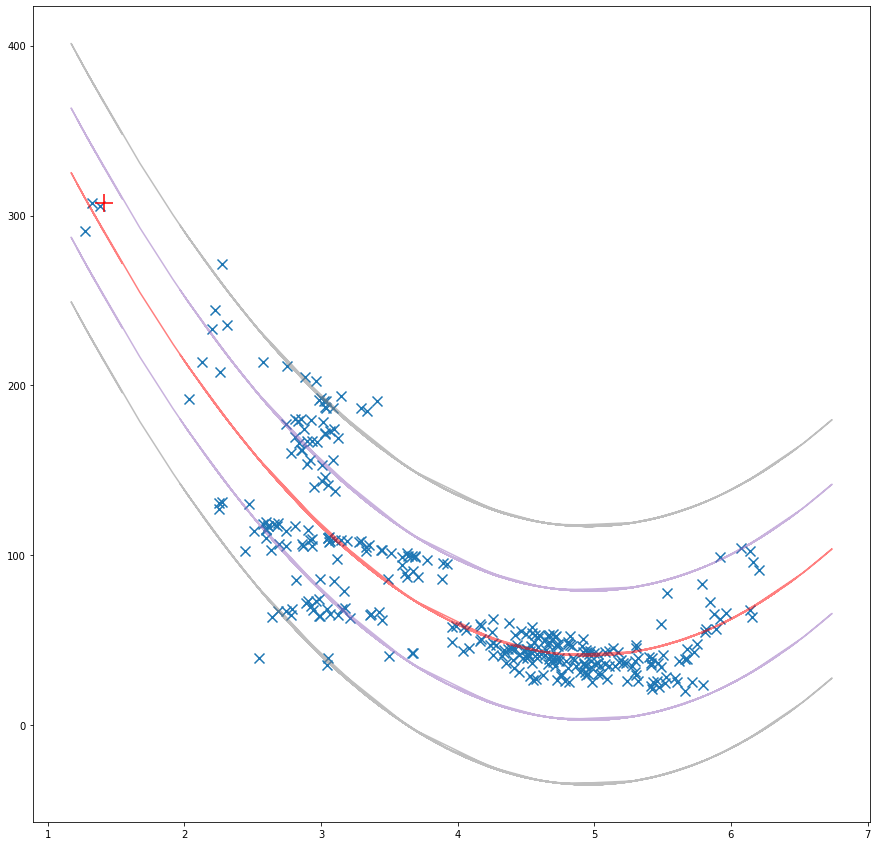

In [28]:
# Custom std

# std formula
y_std  = (np.std(y-lr_func(X)))/2

std4 =  lr_func(X) + y_std
std5 = lr_func(X) + 2*y_std
std2 = lr_func(X) -y_std
std1=  lr_func(X) -2 * y_std

fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(X_test,y_test, marker='x', s=100, color="C0")
plt.scatter(X[-1:],y[-1:], marker = '+',color = 'r', s = 300)
plt.plot(X, lr_func(X),c="red", alpha=0.5)
plt.plot(X, std5,c="C7",alpha=0.5)
plt.plot(X, std4,c="C4",alpha=0.5)
plt.plot(X, std2,c="C4",alpha=0.5)
plt.plot(X, std1,c="C7",alpha=0.5);

### Framing 2

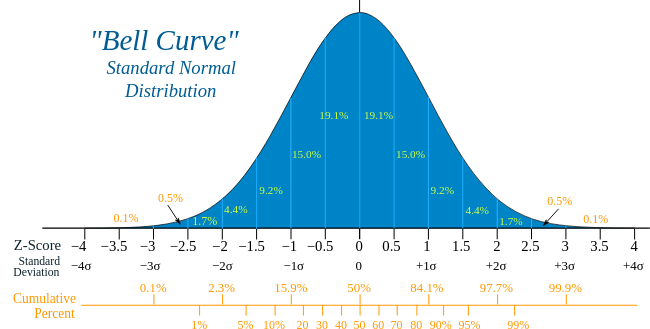

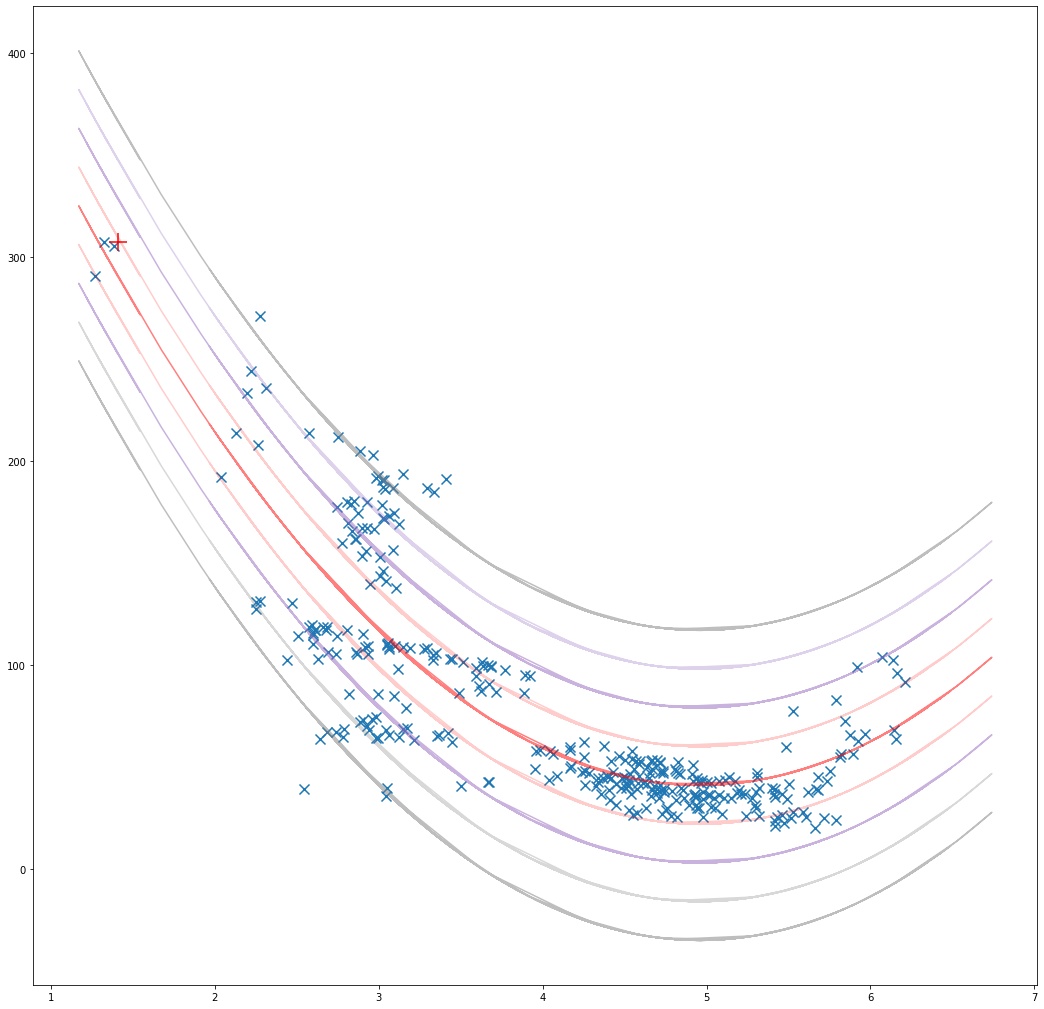

In [29]:
# Custom std

# std formula
y_std  = (np.std(y-lr_func(X)))/2


std5 = lr_func(X) + 2*y_std
std4 =  lr_func(X) + y_std
std2 = lr_func(X) -y_std
std1=  lr_func(X) -2 * y_std
std4_5 = lr_func(X) + 1.5*y_std
std1_5=  lr_func(X) -1.5 * y_std
std3_5 = lr_func(X) + 0.5*y_std
std0_5=  lr_func(X) -0.5 * y_std


fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_test,y_test, marker='x', s=100, color="C0")
plt.scatter(X[-1:],y[-1:], marker = '+',color = 'r', s = 300)
plt.plot(X, lr_func(X),c="red", alpha=0.5)
plt.plot(X, std5,c="C7",alpha=0.5)
plt.plot(X, std4,c="C4",alpha=0.5)
plt.plot(X, std2,c="C4",alpha=0.5)
plt.plot(X, std1,c="C7",alpha=0.5)
plt.plot(X, std4_5,c="C4",alpha=0.3)
plt.plot(X, std1_5,c="C7",alpha=0.3)
plt.plot(X, std3_5,c="red",alpha=0.2)
plt.plot(X, std0_5,c="red",alpha=0.2);

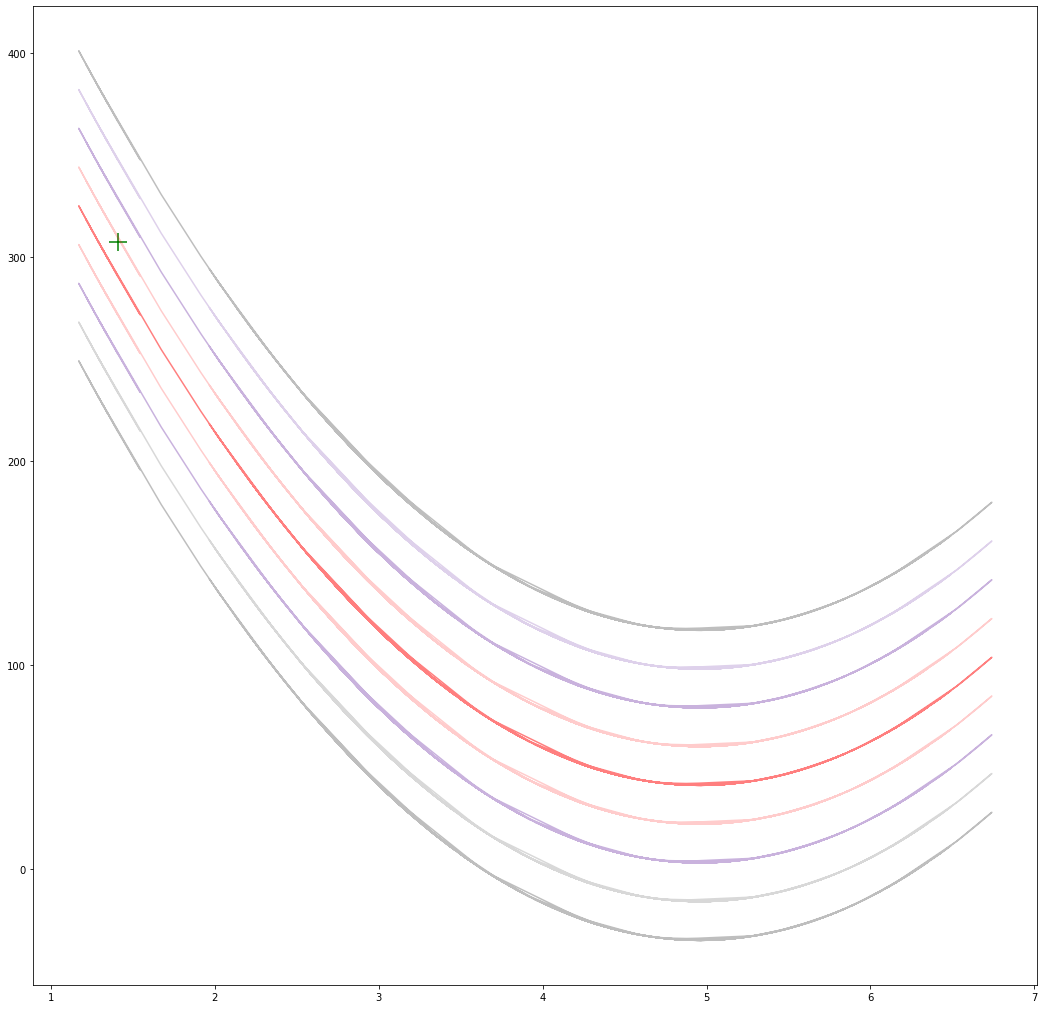

In [30]:
# Custom std - last value only

# std formula
y_std  = (np.std(y-lr_func(X)))/2


std5 = lr_func(X) + 2*y_std
std4 =  lr_func(X) + y_std
std2 = lr_func(X) -y_std
std1=  lr_func(X) -2 * y_std
std4_5 = lr_func(X) + 1.5*y_std
std1_5=  lr_func(X) -1.5 * y_std
std3_5 = lr_func(X) + 0.5*y_std
std0_5=  lr_func(X) -0.5 * y_std


fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X[-1:],y[-1:], marker = '+',color = 'green', s = 300)
plt.plot(X, lr_func(X),c="red", alpha=0.5)
plt.plot(X, std5,c="C7",alpha=0.5)
plt.plot(X, std4,c="C4",alpha=0.5)
plt.plot(X, std2,c="C4",alpha=0.5)
plt.plot(X, std1,c="C7",alpha=0.5)
plt.plot(X, std4_5,c="C4",alpha=0.3)
plt.plot(X, std1_5,c="C7",alpha=0.3)
plt.plot(X, std3_5,c="red",alpha=0.2)
plt.plot(X, std0_5,c="red",alpha=0.2);

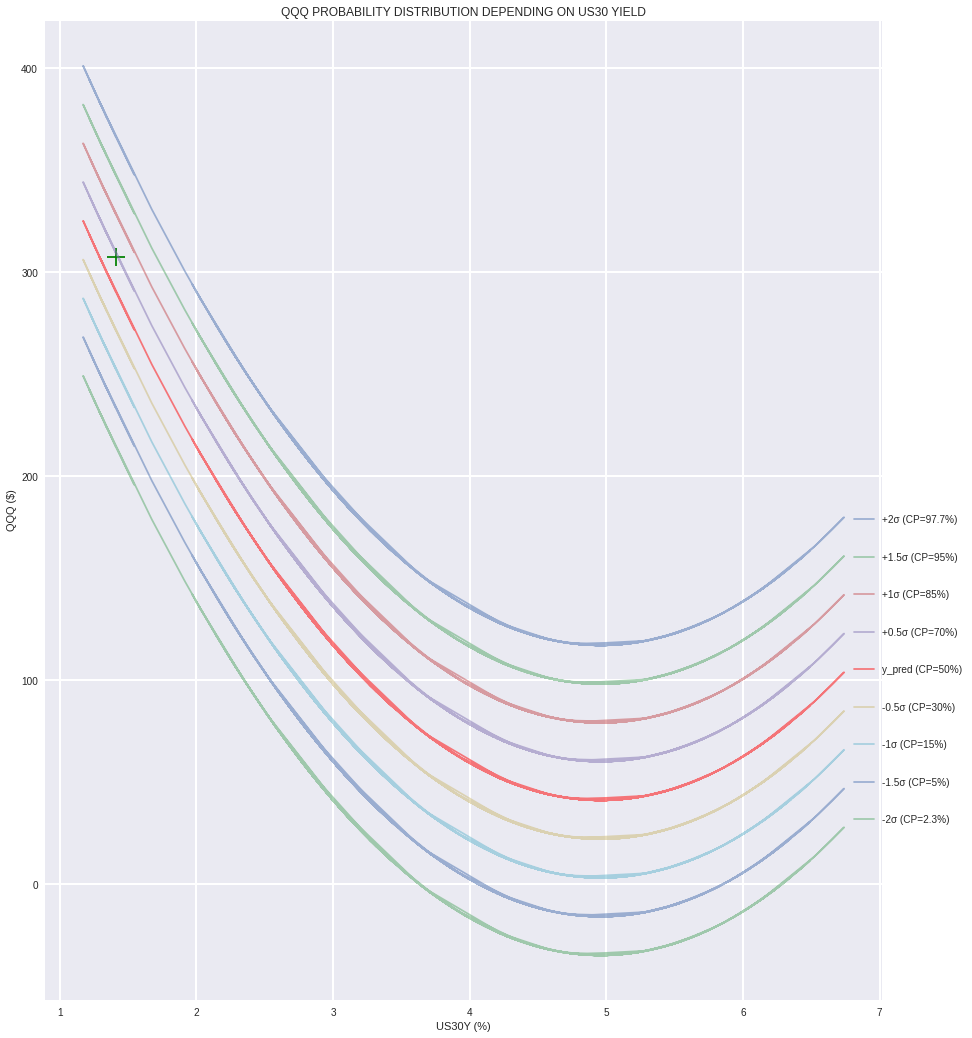

In [31]:
# with seaborn
import plotly
import plotly.tools as tls
import plotly.express as px

# Custom std - last value only
plt.style.use('seaborn')

# std formula
y_std  = (np.std(y-lr_func(X)))/2


std5 = lr_func(X) + 2*y_std
std4 =  lr_func(X) + y_std
std2 = lr_func(X) -y_std
std1=  lr_func(X) -2 * y_std
std4_5 = lr_func(X) + 1.5*y_std
std1_5=  lr_func(X) -1.5 * y_std
std3_5 = lr_func(X) + 0.5*y_std
std0_5=  lr_func(X) -0.5 * y_std


fig, ax = plt.subplots(figsize=(15,18))
plt.scatter(X[-1:],y[-1:], marker = '+',color = 'green', s = 300)

plt.plot(X, std5,alpha=0.5,label='+2σ (CP=97.7%)')
plt.plot(X, std4_5,alpha=0.5,label='+1.5σ (CP=95%)')
plt.plot(X, std4,alpha=0.5,label='+1σ (CP=85%)')
plt.plot(X, std3_5,alpha=0.5,label='+0.5σ (CP=70%)')
plt.plot(X, lr_func(X),c="red", alpha=0.5,label='y_pred (CP=50%)')
plt.plot(X, std0_5,alpha=0.5,label='-0.5σ (CP=30%)')
plt.plot(X, std2,alpha=0.5,label='-1σ (CP=15%)')
plt.plot(X, std1_5,alpha=0.5,label='-1.5σ (CP=5%)')
plt.plot(X, std1,alpha=0.5,label='-2σ (CP=2.3%)')


df1 = pd.DataFrame(X)[[0]].rename(columns=({0:'X'}))
df3 = pd.DataFrame(std5)[[0]].rename(columns=({0:'std5'}))

fig=px.scatter(df,x='US30Y',y='QQQ')

ax.set(xlabel='US30Y (%)', ylabel=' QQQ ($)',
       title='QQQ PROBABILITY DISTRIBUTION DEPENDING ON US30 YIELD')
ax.grid(which='both',color='w', linestyle='-', linewidth=2)
leg = ax.legend(loc=4, bbox_to_anchor=(0.7, 0.175, 0.4, 1), borderaxespad=0, labelspacing=2.75)


#  Presentación

In [41]:
df2 = pd.DataFrame(lr_func(X))[[0]].rename(columns=({0:'lfx'}))

fig=px.scatter(df,x=df['US30Y'][-1:],y=df['QQQ'][-1:],title = 'QQQ (USD) PROBABILITY DISTRIBUTION DEPENDING ON US30 YIELD (%)')

fig.add_trace(go.Line(x=df1.X,y=df2.lfx,name='y_pred (CP=50%)'))


fig.update_layout(
    margin=dict(l=30, r=50, t=20, b=20),
    paper_bgcolor="#09293b",
    plot_bgcolor='#d8e3e8',
    font = {"size": 9, "color":"White"},
    colorway=['#a31c29'],
    legend=dict(x=1,y=0.15),
)

fig.show();

In [33]:

df2 = pd.DataFrame(lr_func(X))[[0]].rename(columns=({0:'lfx'}))
df3 = pd.DataFrame(std5)[[0]].rename(columns=({0:'std5'}))
df4 = pd.DataFrame(std4)[[0]].rename(columns=({0:'std4'}))
df5 = pd.DataFrame(std2)[[0]].rename(columns=({0:'std2'}))
df6 = pd.DataFrame(std1)[[0]].rename(columns=({0:'std1'}))
df7 = pd.DataFrame(std0_5)[[0]].rename(columns=({0:'std0_5'}))
df8 = pd.DataFrame(std3_5)[[0]].rename(columns=({0:'std3_5'}))
df9 = pd.DataFrame(std1_5)[[0]].rename(columns=({0:'std1_5'}))
df10 = pd.DataFrame(std4_5)[[0]].rename(columns=({0:'std4_5'}))

fig=px.scatter(df,x=df['US30Y'][-1:],y=df['QQQ'][-1:],title = 'QQQ (USD) PROBABILITY DISTRIBUTION DEPENDING ON US30 YIELD (%)',color_discrete_sequence=['red'])

fig.add_trace(go.Line(x=df1.X, y=df3.std5,name='+2σ (CP=97.7%)',opacity=0.5))
fig.add_trace(go.Line(x=df1.X, y=df10.std4_5,name='+1.5σ (CP=95%)',opacity=0.5))
fig.add_trace(go.Line(x=df1.X, y=df4.std4,name='+1σ (CP=85%)',opacity=0.5))
fig.add_trace(go.Line(x=df1.X, y=df8.std3_5,name='+0.5σ (CP=70%)',opacity=0.75))
fig.add_trace(go.Line(x=df1.X,y=df2.lfx,name='y_pred (CP=50%)'))
fig.add_trace(go.Line(x=df1.X, y=df5.std2,name='-1σ (CP=15%)',opacity=0.5))
fig.add_trace(go.Line(x=df1.X, y=df7.std0_5,name='-0.5σ (CP=30%)',opacity=0.75))
fig.add_trace(go.Line(x=df1.X, y=df9.std1_5,name='-1.5σ (CP=5%)',opacity=0.75))
fig.add_trace(go.Line(x=df1.X, y=df6.std1,name='-2σ (CP=2.3%)',opacity=0.5))


fig.update_layout(
    margin=dict(l=30, r=50, t=20, b=20),
    paper_bgcolor="#09293b",
    plot_bgcolor='#d8e3e8',
    font = {"size": 9, "color":"White"},
    colorway=['#b8b393','#47807a','#b8b393','#de9f0b','#de400b','#a31c29','#de9f0b','#de400b'],
    legend=dict(x=1,y=0.15),
)


fig.show();

In [39]:

df2 = pd.DataFrame(lr_func(X))[[0]].rename(columns=({0:'lfx'}))
df3 = pd.DataFrame(std5)[[0]].rename(columns=({0:'std5'}))
df4 = pd.DataFrame(std4)[[0]].rename(columns=({0:'std4'}))
df5 = pd.DataFrame(std2)[[0]].rename(columns=({0:'std2'}))
df6 = pd.DataFrame(std1)[[0]].rename(columns=({0:'std1'}))
df7 = pd.DataFrame(std0_5)[[0]].rename(columns=({0:'std0_5'}))
df8 = pd.DataFrame(std3_5)[[0]].rename(columns=({0:'std3_5'}))
df9 = pd.DataFrame(std1_5)[[0]].rename(columns=({0:'std1_5'}))
df10 = pd.DataFrame(std4_5)[[0]].rename(columns=({0:'std4_5'}))

fig=px.scatter(df,x='US30Y',y='QQQ',title = 'QQQ (USD) PROBABILITY DISTRIBUTION DEPENDING ON US30 YIELD (%)',opacity=0.5)

fig.add_trace(go.Line(x=df1.X, y=df3.std5,name='+2σ (CP=97.7%)',opacity=0.5))
fig.add_trace(go.Line(x=df1.X, y=df10.std4_5,name='+1.5σ (CP=95%)',opacity=0.5))
fig.add_trace(go.Line(x=df1.X, y=df4.std4,name='+1σ (CP=85%)',opacity=0.5))
fig.add_trace(go.Line(x=df1.X, y=df8.std3_5,name='+0.5σ (CP=70%)',opacity=0.75))
fig.add_trace(go.Line(x=df1.X,y=df2.lfx,name='y_pred (CP=50%)'))
fig.add_trace(go.Line(x=df1.X, y=df5.std2,name='-1σ (CP=15%)',opacity=0.5))
fig.add_trace(go.Line(x=df1.X, y=df7.std0_5,name='-0.5σ (CP=30%)',opacity=0.75))
fig.add_trace(go.Line(x=df1.X, y=df9.std1_5,name='-1.5σ (CP=5%)',opacity=0.75))
fig.add_trace(go.Line(x=df1.X, y=df6.std1,name='-2σ (CP=2.3%)',opacity=0.5))


fig.update_layout(
    margin=dict(l=30, r=50, t=20, b=20),
    paper_bgcolor="#09293b",
    plot_bgcolor='#d8e3e8',
    font = {"size": 9, "color":"White"},
    colorway=['#b8b393','#47807a','#b8b393','#de9f0b','#de400b','#a31c29','#de9f0b','#de400b'],
    legend=dict(x=1,y=0.15),
)


fig.show();
